In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/data_banknote_authentication.csv')

In [3]:
df['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [22]:
df

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [14]:
x=df.drop('Class',axis=1).values
y=df['Class'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [20]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers.legacy import SGD

In [28]:
model=Sequential()
model.add(Dense(10,activation='relu',activity_regularizer=l1(0.01)))
model.add(Dense(5,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [32]:
model.fit(x_train,y_train,validation_data=[x_test,y_test],epochs=300,callbacks=[early])

Epoch 1/300


2023-04-15 12:29:05.736446: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 12ms/step - loss: 0.7737 - val_loss: 0.9316
Epoch 2/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7546 - val_loss: 0.8793
Epoch 3/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7439 - val_loss: 0.8419
Epoch 4/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7368 - val_loss: 0.8155
Epoch 5/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7311 - val_loss: 0.7945
Epoch 6/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7249 - val_loss: 0.7822
Epoch 7/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7205 - val_loss: 0.7756
Epoch 8/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7166 - val_loss: 0.7705
Epoch 9/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7128 - val_loss: 0.7690
Epoch 10/300
30/30 [==============================] - 0s 7ms/step - loss: 0.7093 - val_loss: 0.7670
Epoch 11/300
30/30 [

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                50        
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss=pd.DataFrame(model.history.history)

<Axes: >

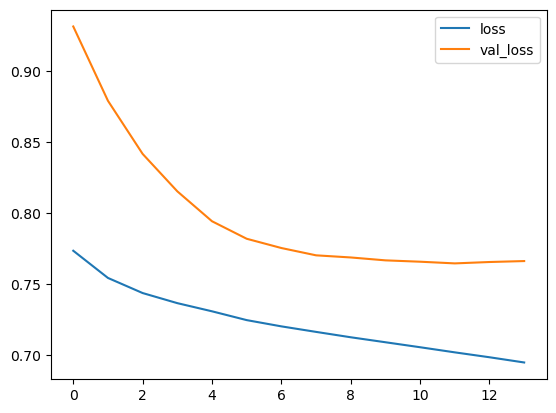

In [35]:
loss.plot()

In [38]:
pred=(model.predict(x_test)>0.5).astype('int32')

13/13 [==============================] - 0s 2ms/step


In [40]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       238
           1       0.62      0.68      0.65       174

    accuracy                           0.69       412
   macro avg       0.69      0.69      0.69       412
weighted avg       0.70      0.69      0.69       412



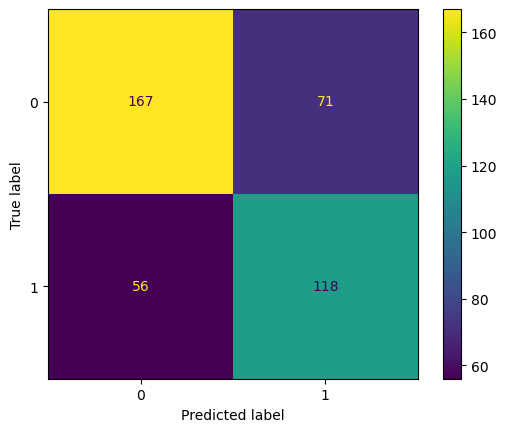

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [43]:
new=x_test[0].reshape(-1,4)

In [45]:
a=scaler.transform(new)

In [48]:
pr=(model.predict(a)>0.5).astype('int32')

1/1 [==============================] - 0s 12ms/step


In [49]:
pr

array([[0]], dtype=int32)

In [50]:
y_test[0]

0